**Análise Exploratória**

In [ ]:
# Importando as bibliotecas necessárias para essa aula e também outra biblioteca de visualização de dados "seaborn":
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
# Agora vamos aprender uma terceira maneira de ter acesso a arquivos (a primeira foi importando os arquivos para o colab permanentemente,
# a segunda carregando os arquivos no notebook temporariamente) que é carregar os arquivos através de código temporariamente:
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [ ]:
# Vou criar um dataframe com o arquivo carregado e apresentar as 5 primeiras linhas:
df = pd.read_excel('AdventureWorks.xlsx')
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [ ]:
# Vamos verificar a quantidade de linhas:
df.shape

(904, 16)

In [ ]:
# Vamos verificar o tipo dos dados de cada coluna:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [ ]:
# Qual a Receita total:
df["Valor Venda"].sum()

5984606.1426

In [ ]:
# Qual o Custo total, vamos criar uma nova coluna com o "custo" no dataframe:
df["custo"] = df['Custo Unitário'].mul(df["Quantidade"])

In [ ]:
# Vamos verificar se a coluna foi criada corretamente:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [ ]:
# Agora sim podemos obter o custo total dos produtos vendidos que estão nas linhas do dataframe,
# além disso vou utilizar o método "round" :
round(df["custo"].sum(),2)

2486783.05

In [ ]:
# Agora que tenho o custo e o valor de venda de cada produto, quero obter o lucro de cada venda realizada:
df['lucro'] = df['Valor Venda'] - df['custo']
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [ ]:
# Com a nova coluna de lucro de cada venda posso obter o lucro total:
round(df['lucro'].sum(), 2)

3497823.09

In [ ]:
# Quero saber agora quanto tempo entre a compra e a data de envio de cada produto,
# para isso vou criar uma nova coluna com o número de dias para enviar cada produto adquirido:
df["Tempo_envio"] = df['Data Envio'] - df['Data Venda']

In [ ]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


**Agora quero saber a média de tempo de envio para cada marca de produto**

In [ ]:
# Para isso tenho que transformar a nova coluna de tempo de envio em numérica:
df["Tempo_envio"] = (df['Data Envio'] - df['Data Venda']).dt.days

In [ ]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [ ]:
df['Tempo_envio'].dtypes

dtype('int64')

In [ ]:
# Posso agora obter a média de tempo de envio por marca:
df.groupby('Marca')['Tempo_envio'].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_envio, dtype: float64

**Vamos verificar agora se temos "Missing Values" (valores ausentes na base de dados)**

In [ ]:
# Verificando se temos dados faltantes no dataframe:
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
Tempo_envio       0
dtype: int64

**Vamos obter agora o lucro realizado na venda de produtos por "Ano" e por "Marca":**

In [ ]:
# Vamos agrupar por ano e por marca:
df.groupby([df['Data Venda'].dt.year, "Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: lucro, dtype: float64

In [ ]:
# Para melhor a apresentação dos valores, posso rodar o seguinte comando de configuração do notebook:
pd.options.display.float_format = '{:20,.2f}'.format

In [ ]:
# Agora a visulização do lucro por ano e marca fica assim:
df.groupby([df['Data Venda'].dt.year, "Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: lucro, dtype: float64

In [ ]:
# Quero transformar o resultado da visualização do lucro por ano e marca em um dataframe,
# para isso vou utilizar o método "reset_index()":
lucro_ano = df.groupby([df['Data Venda'].dt.year, "Marca"])["lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [ ]:
# Vou obter a quantidade total vendida de cada produto: 
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

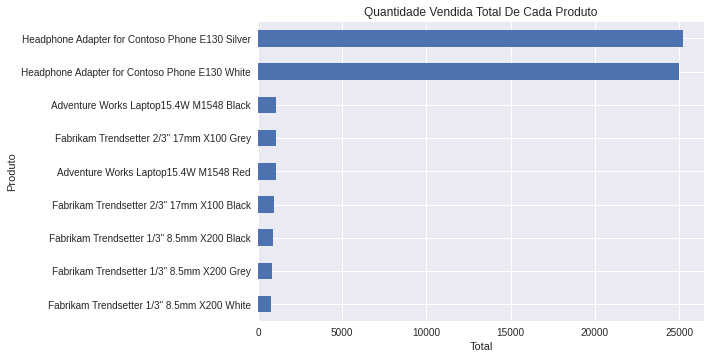

In [ ]:
# Agora quero apresentar o resultado anterior em um gráfico:
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title='Quantidade Vendida Total De Cada Produto')
plt.xlabel('Total')
plt.ylabel('Produto');

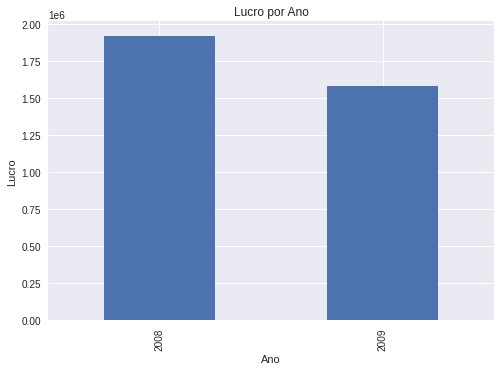

In [ ]:
# Vamos obter o lucro pro ano:
df.groupby([df['Data Venda'].dt.year])["lucro"].sum().plot.bar(title='Lucro por Ano')
plt.xlabel('Ano')
plt.ylabel('Lucro');

In [ ]:
# Como os resultados no gráfico acima estão em notação científica, vou verificar os valores exatos:
df.groupby([df['Data Venda'].dt.year])["lucro"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: lucro, dtype: float64

In [ ]:
# Vamos selecionar apenas as vendas ocorridas em 2009 e criar um novo dataframe com a informação:
df_2009 = df[df['Data Venda'].dt.year == 2009]

In [ ]:
# Visualizando as primeiras linhas do dataframe criado:
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


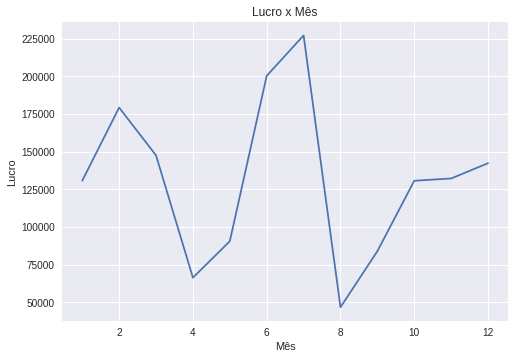

In [ ]:
# Vamos apresentar num gráfico de linhas para o dataframe com as vendas de 2009 o lucro mensal obtido:
df_2009.groupby(df['Data Venda'].dt.month)['lucro'].sum().plot(title='Lucro x Mês')
plt.xlabel('Mês')
plt.ylabel('Lucro');

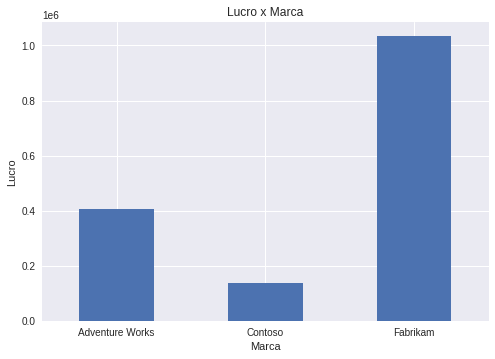

In [ ]:
# Mais um gráfico para apresentar lucro por marca, a diferença aqui é que as legendas do eixo x estarão na posição horizontal:
df_2009.groupby('Marca')['lucro'].sum().plot.bar(title='Lucro x Marca')
plt.xlabel('Marca')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal');

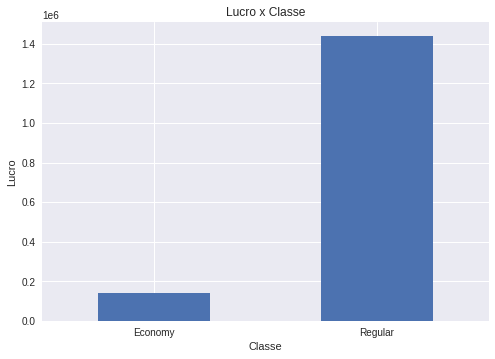

In [ ]:
# Agora vou ver o lucro por classe:
df_2009.groupby('Classe')['lucro'].sum().plot.bar(title='Lucro x Classe')
plt.xlabel('Classe')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal');

In [ ]:
# Vamos agora apresentar as estatísticas básicas para a coluna de “Tempo_envio”:
df['Tempo_envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_envio, dtype: float64

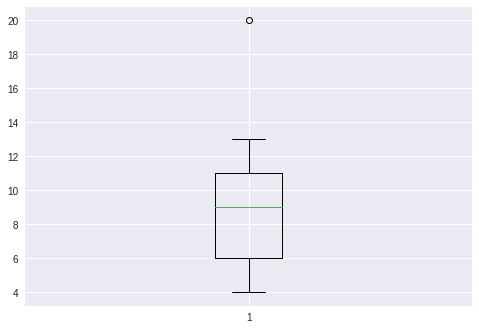

In [ ]:
# Vamos apresentar um gráfico do tipo “boxplot” para mostrar os quartis
# relacionados a coluna de “Tempo_envio” (podemos verificar que o valor máximo
# do nosso dataframe, “20”, na realidade é um “outlier”
# porque é muito discrepante do restante dos valores:
plt.boxplot(df['Tempo_envio']);

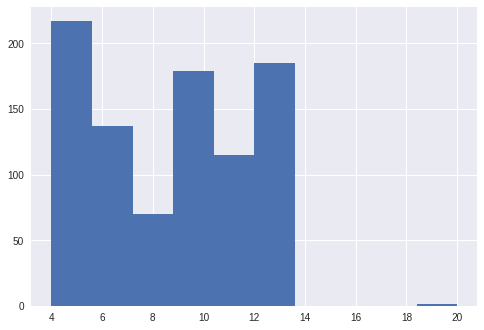

In [ ]:
# Podemos ver essa informação discrepante também num gráfico histograma:
plt.hist(df['Tempo_envio']);

In [ ]:
# Podemos confirmar as informações apresentadas no “describe” utilizando outros métodos:
# Tempo mínimo de envio
print(df['Tempo_envio'].min())
# Tempo máximo de envio
print(df['Tempo_envio'].max())


4
20


In [ ]:
# Vamos identificar quem são os pontos “Outlier” (no dataframe apenas 1 registro):
df[df['Tempo_envio'] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [ ]:
# Agora podemos guardar todas as análises que realizamos num arquivo “.csv” por exemplo:
df.to_csv("df_vendas_novo.csv", index = False)